---

# <center> ★ Machine Learning Project - Ad Budget Estimation ★
#### <center> ***Domain: Automotive***

---

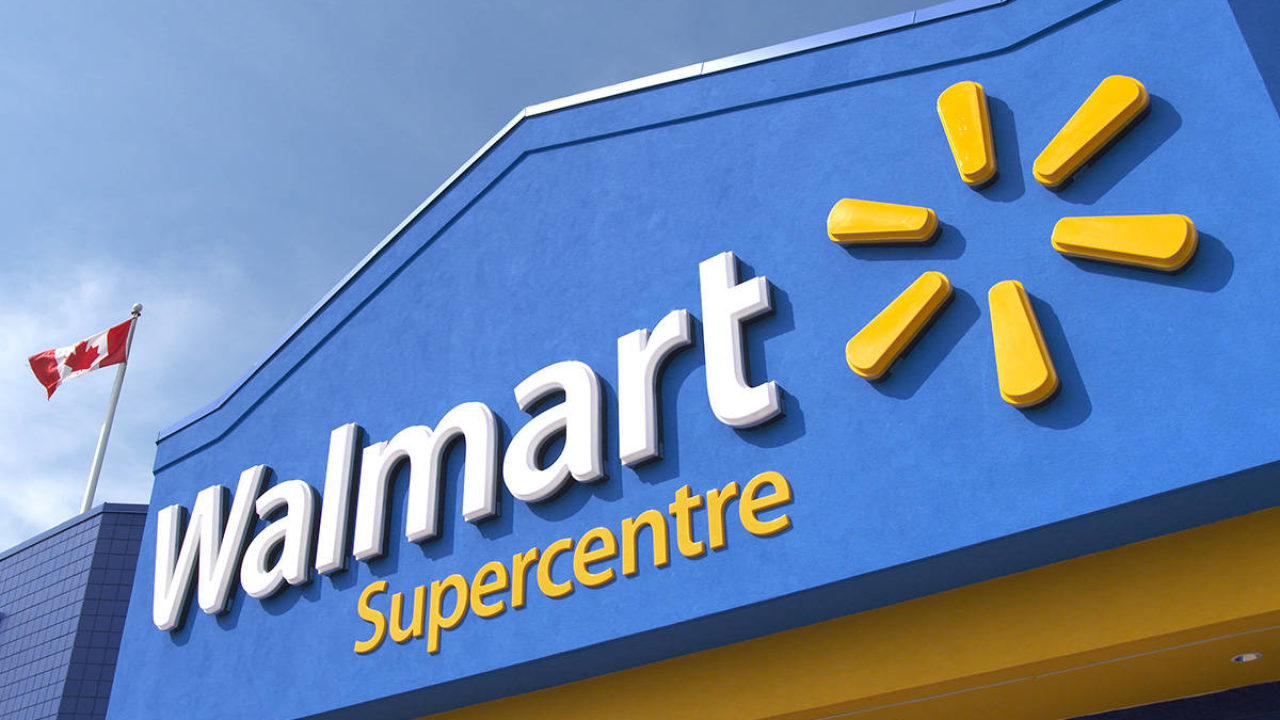

In [1]:
from IPython import display
display.Image('https://raw.githubusercontent.com/Masterx-AI/Project_Retail_Analysis_with_Walmart/main/Wallmart1.jpg')

---

### Description:

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

Dataset Info:\
This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:\
* Store - the store number
* Date - the week of sales
* Weekly_Sales -  sales for the given store
* Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
* Temperature - Temperature on the day of sale
* Fuel_Price - Cost of fuel in the region
* CPI – Prevailing consumer price index
* Unemployment - Prevailing unemployment rate
* Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Acknowledgements
The dataset is taken from Kaggle.

### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare their respective scores like R2, RMSE, etc.

---

# <center> Stractegic Plan of Action:

**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**
1. Data Exploration
2. Exploratory Data Analysis (EDA)
3. Data Pre-processing
4. Data Manipulation
5. Feature Selection/Extraction
6. Predictive Modelling
7. Project Outcomes & Conclusion

---

# <center>1. Data Exploration

In [14]:
#Importing the basic librarires

import os
import math
import statsmodels
import pandas as pd
import seaborn as sns
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#Importing the dataset

df = pd.read_csv('E:/3017project/archive (4)/Walmart.csv')

#df.drop(['car name'], axis=1, inplace=True)
display(df.head())

original_df = df.copy(deep=True)

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

In [ ]:
# Convert 'Date' column to datetime format with the correct format specified
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract weekday, month, and year features
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Drop the 'Date' column
df.drop(['Date'], axis=1, inplace=True)

# Define target and features
target = 'Weekly_Sales'
features = [col for col in df.columns if col != target]

# Create a copy of the original dataframe
original_df = df.copy(deep=True)

# Display the head of the dataframe
df.head()


In [3]:
#Checking the dtypes of all the columns

df.info()

NameError: name 'df' is not defined

In [4]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

NameError: name 'df' is not defined

In [5]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=45:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

NameError: name 'df' is not defined

In [6]:
#Checking the stats of all the columns

display(df.describe())

NameError: name 'df' is not defined

**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

In [7]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

NameError: name 'plt' is not defined

**Inference:**The Target Variable seems to be be normally distributed, averaging around 20 units.

In [8]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-1)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                               Visualising Categorical Features:                                


NameError: name 'plt' is not defined

**Inference:** There are no categorical features in the dataset.

In [9]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

n=4

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,6*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

                                                Numeric Features Distribution                                                 


NameError: name 'plt' is not defined

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

In [10]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

NameError: name 'df' is not defined

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [13]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [14]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

              Total Null Values  Percentage
Store                         0         0.0
Weekly_Sales                  0         0.0
Holiday_Flag                  0         0.0
Temperature                   0         0.0
Fuel_Price                    0         0.0
CPI                           0         0.0
Unemployment                  0         0.0
weekday                       0         0.0
month                         0         0.0
year                          0         0.0


**Inference:** The datset doesn't have any inconsistant values.

In [15]:
#Converting categorical Columns to Numeric

df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
Holiday_Flag

Dummy Encoding on features:
year
month
Store


(6435, 64)

In [16]:
# for x in [i for i in ecc if i in cf]:
#     a = df3[x]
#     b=[]; c=[]

#     df4 = df3.copy()
#     df4.drop(ecc, axis=1, inplace=True)
#     df4

#     for i,e in enumerate(a):
#         if e!=e:
#             b.append(i)
#         else:
#             c.append(i)

#     RF = RandomForestClassifier()
#     RF.fit(df4.loc[c],a[c])
#     d = RF.predict(df4.loc[b])

#     f=0
#     for i,e in enumerate(df3[x]):
#         if e!=e:
#             df3.loc[i,x] = d[f]
#             f+=1
# df1 = df3.copy()
# df1

In [17]:
# #Converting categorical Columns to Numeric

# df3 = df.copy()

# gcc = nvc[nvc['Percentage']!=0].index.values
# hcc = [i for i in cf if i not in gcc]

# #One-Hot Binay Encoding
# oh=True
# dm=True
# for i in hcc:
#     #print(i)
#     if df3[i].nunique()==2:
#         if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
#         print(i);oh=False
#         df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
#     if (df3[i].nunique()>2 and df3[i].nunique()<17):
#         if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
#         print(i);dm=False
#         df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
# df3.shape

In [18]:
# for x in gcc:
#     a = df3[x]
#     b=[]; c=[]

#     df4 = df3.copy()
#     df4.drop([x], axis=1, inplace=True)
    
#     for i,e in enumerate(a):
#         if e!=e:
#             b.append(i)
#         else:
#             c.append(i)
        
#     LR = LinearRegression()
#     LR.fit(df4.loc[c],a[c])
#     d = LR.predict(df4.loc[b])
        
#     f=0
#     for i,e in enumerate(df3[x]):
#         if e!=e:
#             df3.loc[i,x] = d[f]
#             f+=1
# df3

In [19]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,month_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,False,42.31,2.572,211.096358,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1641957.44,True,38.51,2.548,211.242170,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1611968.17,False,39.93,2.514,211.289143,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,1409727.59,False,46.63,2.561,211.319643,8.106,4,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,1554806.68,False,46.50,2.625,211.350143,8.106,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False



Inference:
Before removal of outliers, The dataset had 6435 samples.
After removal of outliers, The dataset now has 5953 samples.


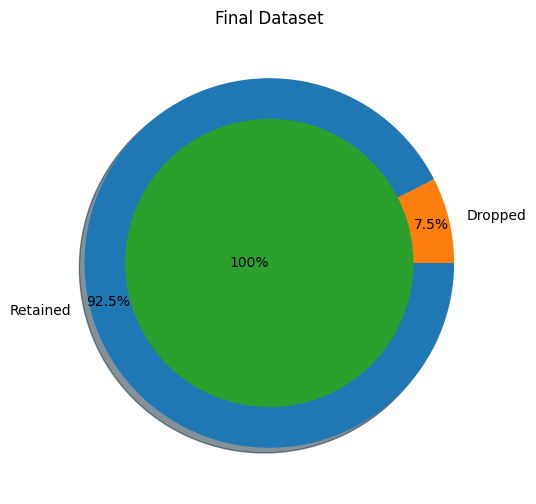


Inference: After the cleanup process, 482 samples were dropped, while retaining 7.49% of the data.


In [20]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

In [21]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (5953, 63) (5953,) 
Training set  --->  (4762, 63) (4762,) 
Testing set   --->  (1191, 63)  (1191,)


In [22]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,month_2,month_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4762.0,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,...,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03
mean,-1.492110e-18,-1.305596e-16,-2.991680e-16,-2.762268e-16,-4.267434e-16,0.0,-5.520807e-17,1.939743e-17,7.460550e-18,3.618367e-17,...,1.529413e-17,4.923963e-17,8.952659e-18,1.342899e-17,-3.730275e-18,-1.492110e-17,3.730275e-17,-2.984220e-17,-4.774752e-17,2.499284e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,0.0,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,...,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-2.742012e-01,-2.961575e+00,-1.871814e+00,-1.248731e+00,-2.762670e+00,0.0,-7.526270e-01,-6.371530e-01,-2.982532e-01,-3.166659e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
25%,-2.742012e-01,-7.314248e-01,-9.886990e-01,-1.076949e+00,-6.783836e-01,0.0,-7.526270e-01,-6.371530e-01,-2.982532e-01,-3.166659e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
50%,-2.742012e-01,1.062547e-01,1.663112e-01,3.842133e-01,9.596435e-02,0.0,-7.526270e-01,-6.371530e-01,-2.982532e-01,-3.166659e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
75%,-2.742012e-01,7.731979e-01,8.427860e-01,9.933828e-01,6.138095e-01,0.0,1.328679e+00,1.569482e+00,-2.982532e-01,-3.166659e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
max,3.646958e+00,2.170008e+00,2.469806e+00,1.340791e+00,2.575491e+00,0.0,1.328679e+00,1.569482e+00,3.352856e+00,3.157903e+00,...,6.356783e+00,6.300861e+00,2.298067e+01,6.328643e+00,7.650163e+00,6.503146e+00,6.356783e+00,6.141290e+00,6.443435e+00,6.564495e+00



                                          Standardardization on Testing set                                          


,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,year_2011,year_2012,month_2,month_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.0,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.005646,0.044406,0.075113,0.021041,-0.050953,0.0,0.052984,0.065042,0.026699,-0.019096,...,-0.004168,-0.017693,0.111140,-0.010959,-0.000055,0.030677,-0.004168,-0.056970,0.016556,0.045053
std,1.009885,1.000220,0.971917,1.004644,1.010206,0.0,1.014188,1.028250,1.040072,0.972715,...,0.987401,0.944330,1.881448,0.965939,1.000214,1.093088,0.987401,0.810380,1.051077,1.134875
min,-0.274201,-2.857425,-1.780457,-1.248731,-2.762670,0.0,-0.752627,-0.637153,-0.298253,-0.316666,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
25%,-0.274201,-0.657516,-0.852751,-1.077025,-0.699355,0.0,-0.752627,-0.637153,-0.298253,-0.316666,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
50%,-0.274201,0.187351,0.298996,0.393492,0.058860,0.0,-0.752627,-0.637153,-0.298253,-0.316666,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
75%,-0.274201,0.818764,0.844961,1.019967,0.611390,0.0,1.328679,1.569482,-0.298253,-0.316666,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
max,3.646958,2.035481,2.469806,1.345814,2.575491,0.0,1.328679,1.569482,3.352856,3.157903,...,6.356783,6.300861,22.980668,6.328643,7.650163,6.503146,6.356783,6.141290,6.443435,6.564495


---

# <center> 5. Feature Selection/Extraction

                                       Correlation Matrix                                       


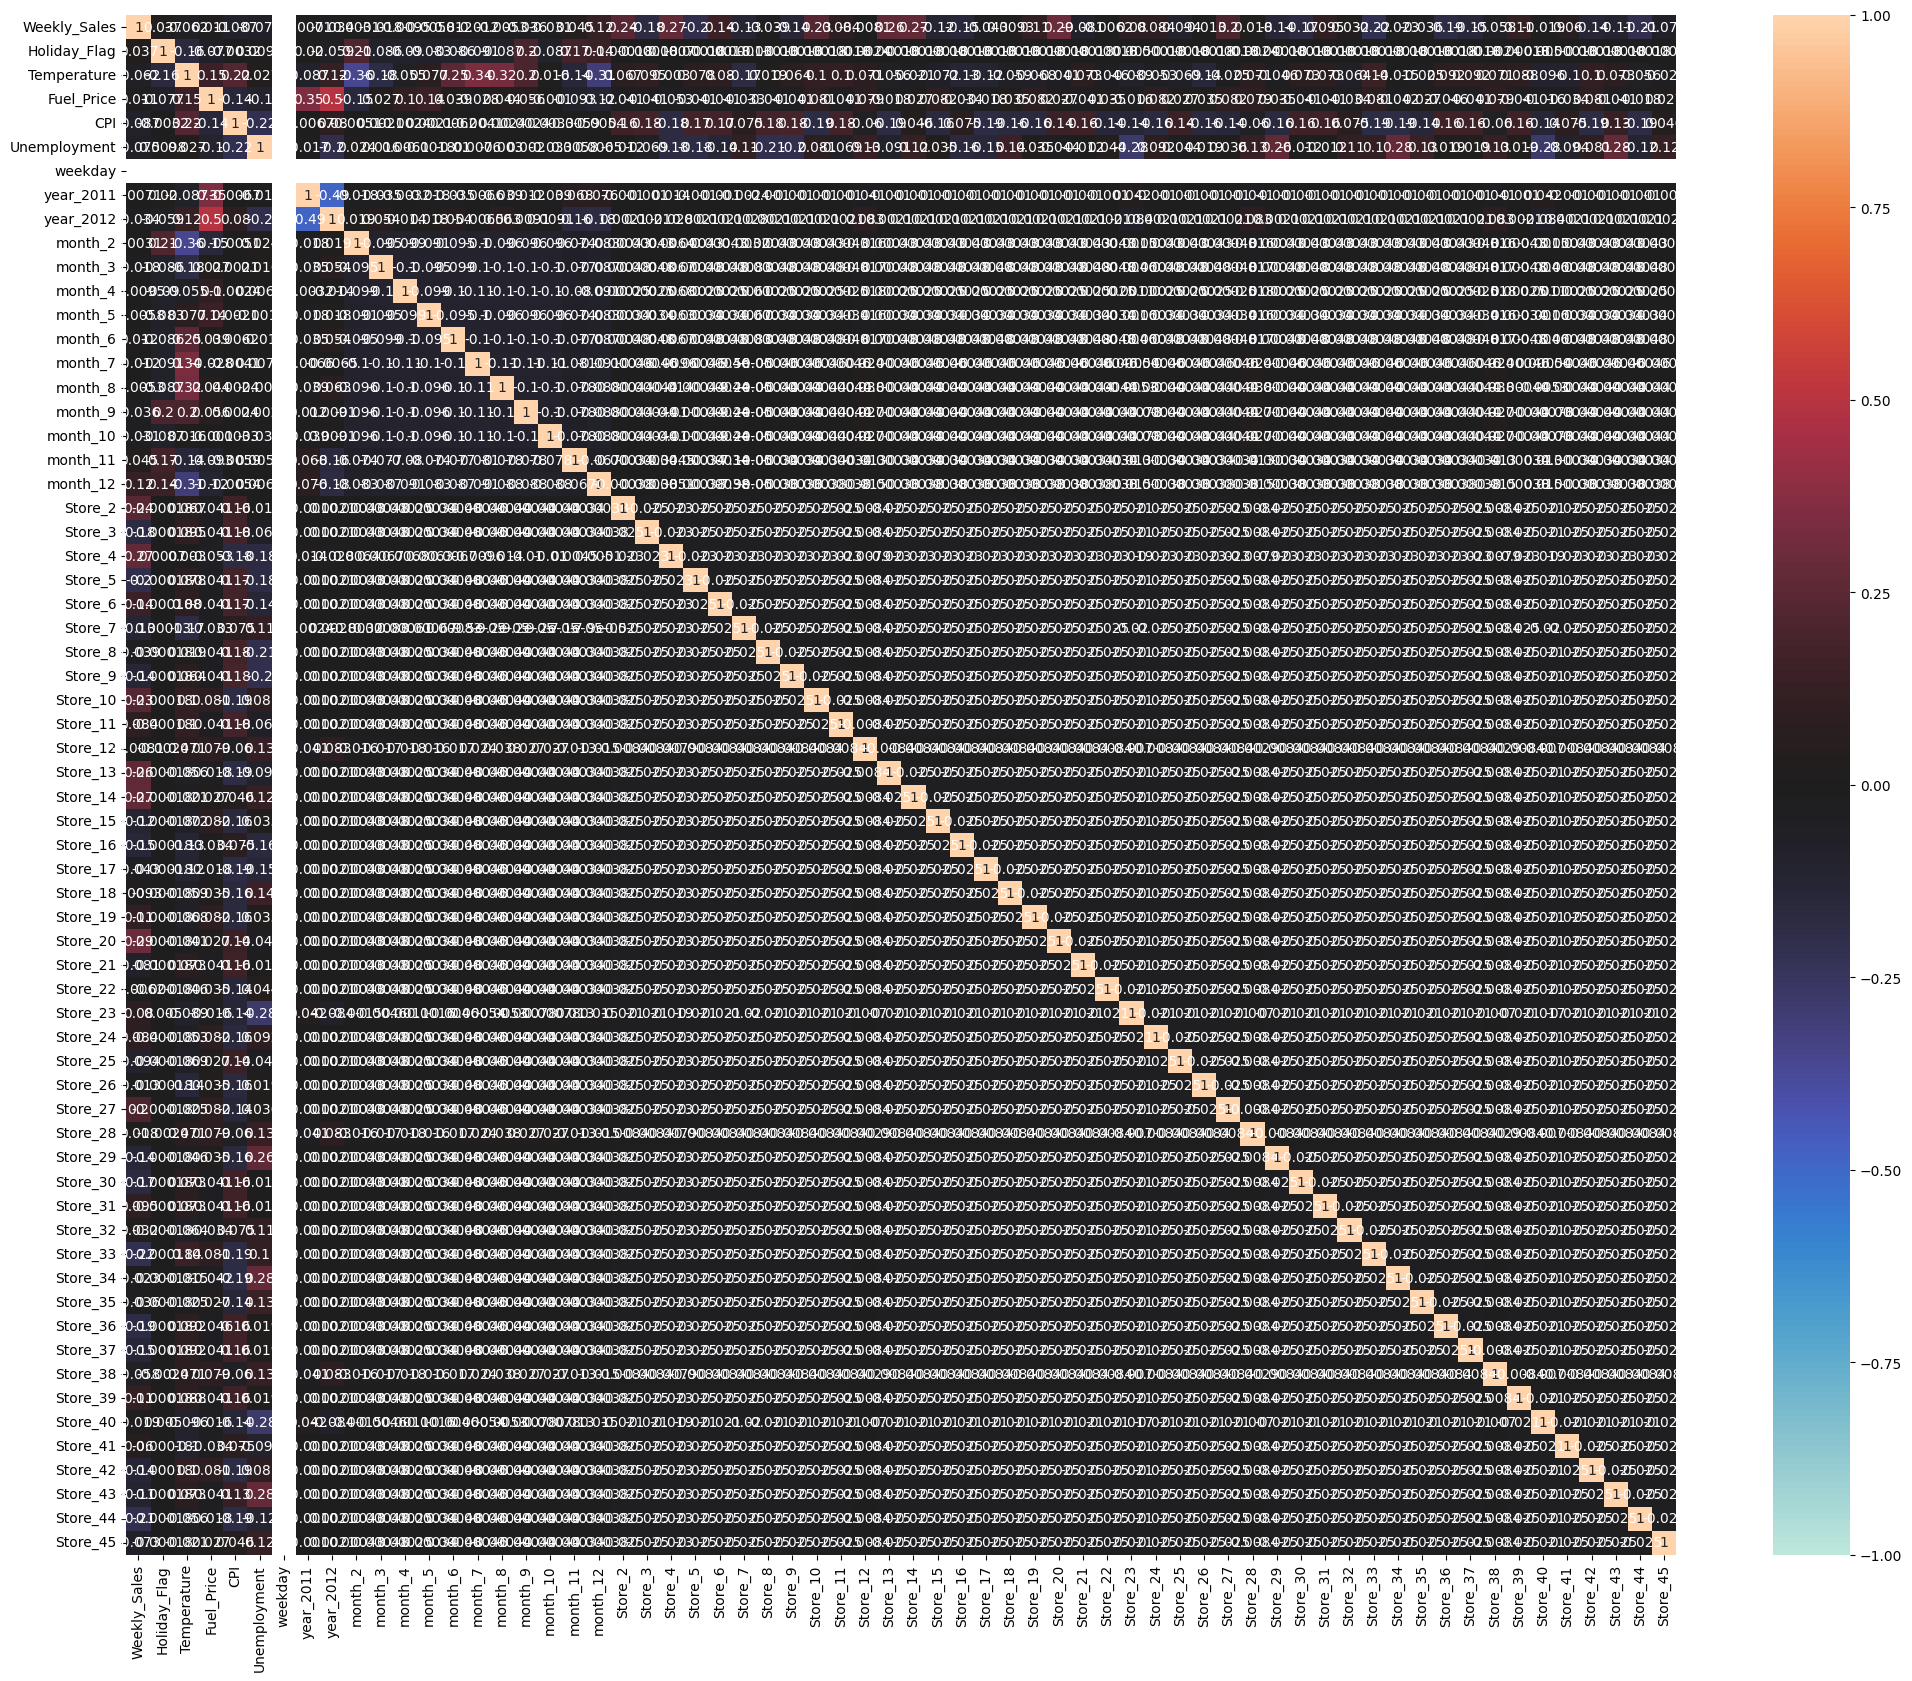

In [23]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [24]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     1155.
Date:                Fri, 12 Apr 2024   Prob (F-statistic):               0.00
Time:                        16:46:33   Log-Likelihood:                -63223.
No. Observations:                4762   AIC:                         1.266e+05
Df Residuals:                    4699   BIC:                         1.270e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.048e+06   2059.199    508.743      0.000    1.04e+06    1.05e+06
Holiday_Flag  8059.9214   2279.678      3.536      0.000    3590.684    1.25e+04
Temperature   1.769e+04   7235.809      2.445      0.015    3504.204    3.19e+04
Fuel_Price   -1296.0299   6741.498     -0.192      0.848   -1.45e+04    1.19e+04
CPI           1.577e+05   7.06e+04      2.233      0.026    1.93e+04    2.96e+05
Unemployment -5.424e+04   7171.270     -7.564      0.000   -6.83e+04   -4.02e+04
weekday      -1.754e-12   4.84e-11     -0.036      0.971   -9.67e-11    9.32e-11
year_2011    -1.523e+04   7195.844     -2.116      0.034   -2.93e+04   -1120.441
year_2012    -2.805e+04   1.04e+04     -2.700      0.007   -4.84e+04   -7678.312
month_2       3.105e+04   3383.632      9.177      0.000    2.44e+04    3.77e+04
month_3       2.123e+04   4074.185      5.211      0.000    1.32e+04    2.92e+04
month_4       2.326e+04   4956.542      4.693      0.000    1.35e+04     3.3e+04
month_5       2.165e+04   5142.688      4.210      0.000    1.16e+04    3.17e+04
month_6        2.84e+04   5716.385      4.968      0.000    1.72e+04    3.96e+04
month_7       1.747e+04   6274.423      2.785      0.005    5171.630    2.98e+04
month_8        2.02e+04   6207.060      3.255      0.001    8034.143    3.24e+04
month_9       2761.7459   5723.463      0.483      0.629   -8458.925     1.4e+04
month_10      9450.4348   5144.900      1.837      0.066    -635.983    1.95e+04
month_11      4.162e+04   3902.022     10.666      0.000     3.4e+04    4.93e+04
month_12      8.575e+04   3975.296     21.570      0.000     7.8e+04    9.35e+04
Store_2       5.429e+04   2849.085     19.056      0.000    4.87e+04    5.99e+04
Store_3      -1.816e+05   3037.660    -59.778      0.000   -1.88e+05   -1.76e+05
Store_4       1.148e+05    2.3e+04      4.999      0.000    6.97e+04     1.6e+05
Store_5      -1.899e+05   3023.242    -62.806      0.000   -1.96e+05   -1.84e+05
Store_6      -7322.3757   3058.926     -2.394      0.017   -1.33e+04   -1325.446
Store_7      -1.284e+05   7132.924    -18.005      0.000   -1.42e+05   -1.14e+05
Store_8      -1.142e+05   3392.659    -33.653      0.000   -1.21e+05   -1.08e+05
Store_9      -1.589e+05   3194.275    -49.741      0.000   -1.65e+05   -1.53e+05
Store_10      1.075e+05   2.39e+04      4.503      0.000    6.07e+04    1.54e+05
Store_11     -3.776e+04   3058.338    -12.347      0.000   -4.38e+04   -3.18e+04
Store_12     -2928.8960   9460.509     -0.310      0.757   -2.15e+04    1.56e+04
Store_13      1.176e+05    2.4e+04      4.891      0.000    7.04e+04    1.65e+05
Store_14      9.566e+04   8660.998     11.045      0.000    7.87e+04    1.13e+05
Store_15     -9.031e+04   2.27e+04     -3.975      0.000   -1.35e+05   -4.58e+04
Store_16     -1.522e+05   7079.401    -21.498      0.000   -1.66e+05   -1.38e+05
Store

 ---

**Approach:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Feature Elmination using PCA Decomposition

## 5a. Manual Method - VIF

Dropped Features -->  ['CPI', 'year_2012', 'Temperature', 'Unemployment', 'month_4', 'Store_30', 'month_2', 'Store_43', 'Fuel_Price', 'month_7', 'Store_8', 'Store_32', 'month_9', 'Store_18', 'Store_27', 'month_10', 'Store_29', 'Store_22', 'Holiday_Flag', 'Store_3', 'month_8', 'Store_2', 'Store_25', 'Store_42', 'month_3', 'Store_16', 'Store_7', 'Store_9', 'Store_6', 'month_5', 'Store_11', 'Store_10', 'Store_19', 'year_2011', 'month_6', 'Store_4', 'Store_13', 'Store_5', 'Store_14', 'Store_20', 'Store_15', 'month_11', 'Store_21', 'Store_17', 'Store_24', 'Store_23', 'Store_26', 'Store_34', 'Store_33', 'Store_35', 'Store_39']


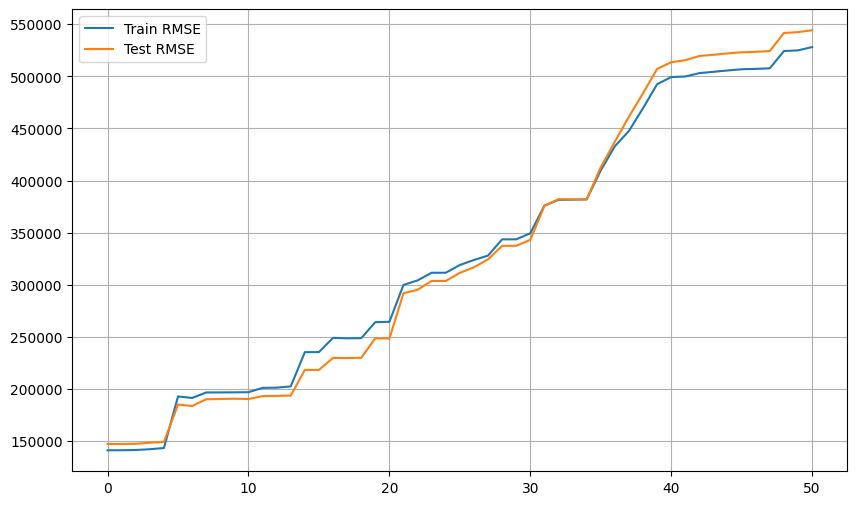

In [25]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
#Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
#Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

DROP=[];b=[]

for i in range(len(Train_X_std.columns)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

        #Trd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
        #Tsd.loc[i,'ord-'+str(k)] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)
        
print('Dropped Features --> ',DROP)
#plt.plot(b)
#plt.show()
#print(API.summary())

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5b. Automatic Method - RFE

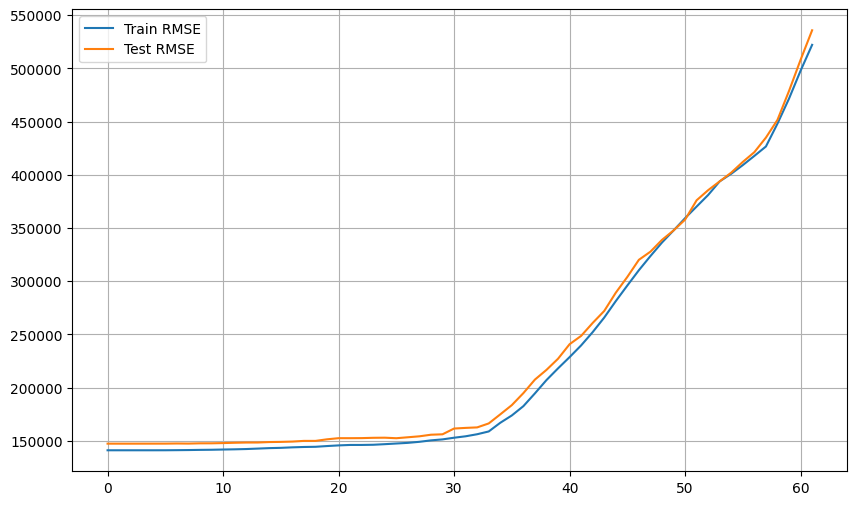

In [26]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)

    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

# plt.figure(figsize=[20,4])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

## 5c. Feature Elmination using PCA Decomposition

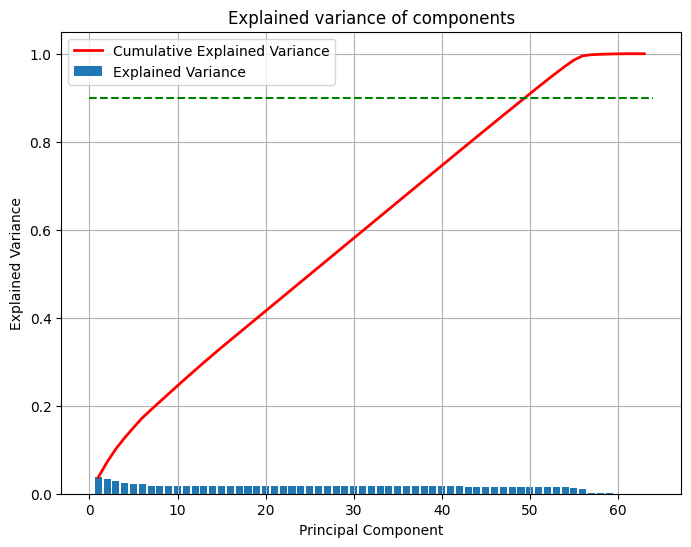

In [27]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

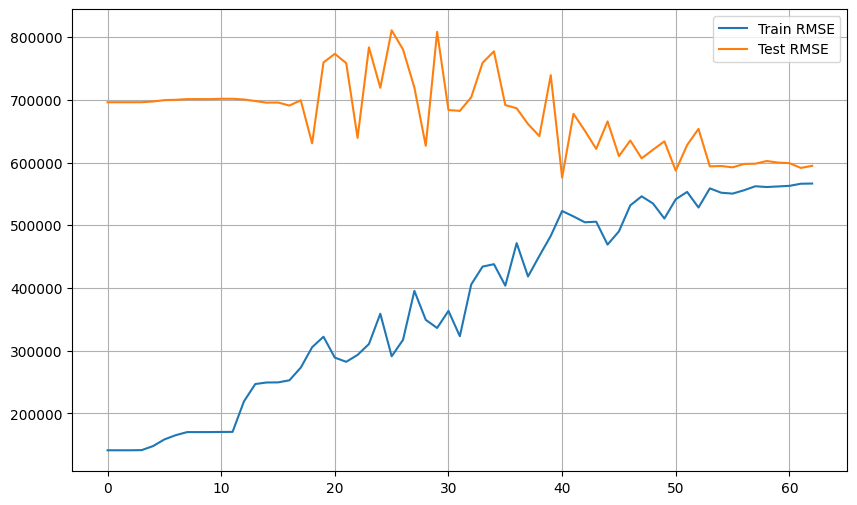

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

# plt.figure(figsize=[20,4.5])
# plt.subplot(1,3,1)
# sns.heatmap(Trd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max())
# plt.title('Train RMSE')
# plt.subplot(1,3,2)
# sns.heatmap(Tsd.loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+10)
# plt.title('Test RMSE')
# plt.subplot(1,3,3)
# sns.heatmap((Trd+Tsd).loc[:6], cmap='BuGn', annot=True, vmin=0, vmax=Trd.max().max()+25)
# plt.title('Total RMSE')
# plt.show()

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()

#### Inference:
It can be seen that the performance of the modelsis quiet comparable unpon dropping features using VIF, RFE & PCA Techniques. Comparing the RMSE plots, the optimal values were found for dropping most  features using manual RFE Technique. But let us skip these for now, as the advanced ML Algorithms take care of multicollinearity.

In [29]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-28)             # running RFE
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

150459.66166466865
155774.02431252034


---

# <center> 6. Predictive Modelling

In [30]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

## Objective: 
Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


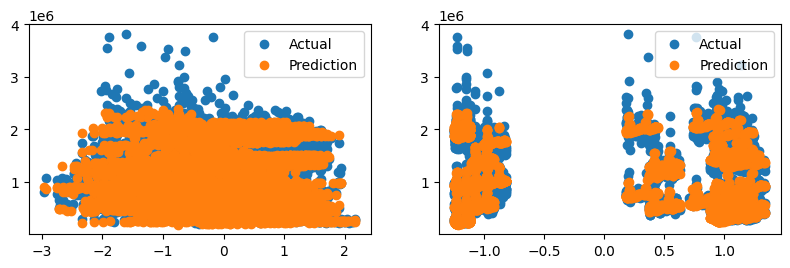



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9300498690131108
Residual Sum of Squares (RSS) on Training set  ---> 107802678811630.14
Mean Squared Error (MSE) on Training set       ---> 22638109788.246563
Root Mean Squared Error (RMSE) on Training set ---> 150459.66166466865

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9290580851277542
Residual Sum of Squares (RSS) on Training set  ---> 28900266060766.55
Mean Squared Error (MSE) on Training set       ---> 24265546650.517677
Root Mean Squared Error (RMSE) on Training set ---> 155774.02431252034

--------------------Residual Plots--------------------


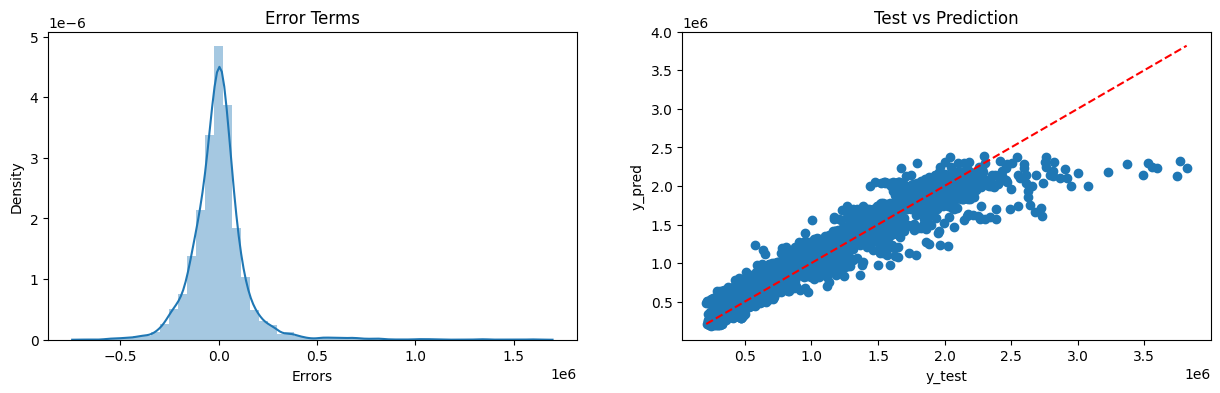

In [31]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


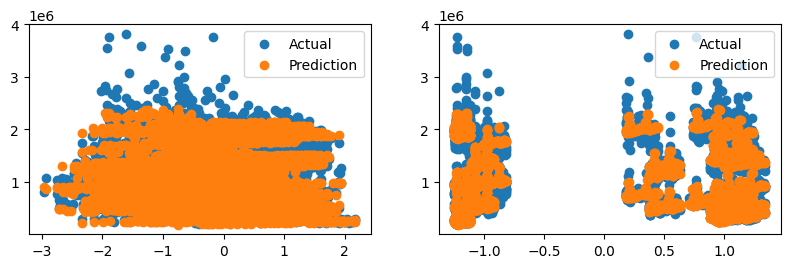



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9300496637936124
Residual Sum of Squares (RSS) on Training set  ---> 107802995082827.47
Mean Squared Error (MSE) on Training set       ---> 22638176203.86969
Root Mean Squared Error (RMSE) on Training set ---> 150459.8823735739

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9290681487441195
Residual Sum of Squares (RSS) on Training set  ---> 28896166351997.594
Mean Squared Error (MSE) on Training set       ---> 24262104409.737694
Root Mean Squared Error (RMSE) on Training set ---> 155762.97509272766

--------------------Residual Plots--------------------


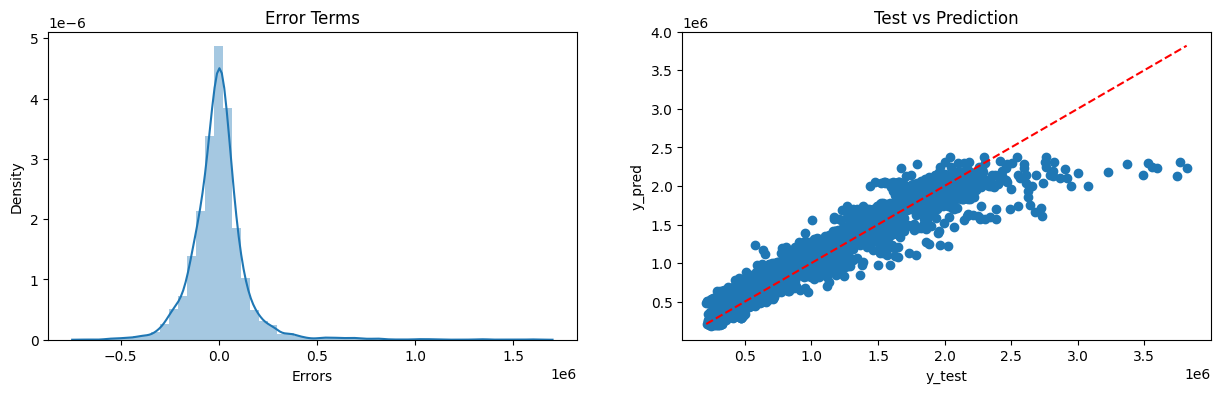

In [32]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


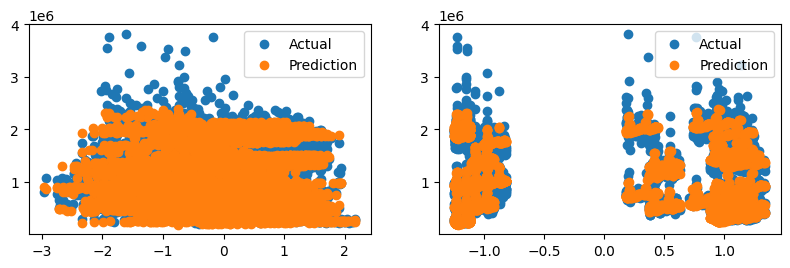



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9300498687633085
Residual Sum of Squares (RSS) on Training set  ---> 107802679196609.3
Mean Squared Error (MSE) on Training set       ---> 22638109869.090572
Root Mean Squared Error (RMSE) on Training set ---> 150459.6619333254

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9290584288786742
Residual Sum of Squares (RSS) on Training set  ---> 28900126023764.98
Mean Squared Error (MSE) on Training set       ---> 24265429071.171272
Root Mean Squared Error (RMSE) on Training set ---> 155773.64690849115

--------------------Residual Plots--------------------


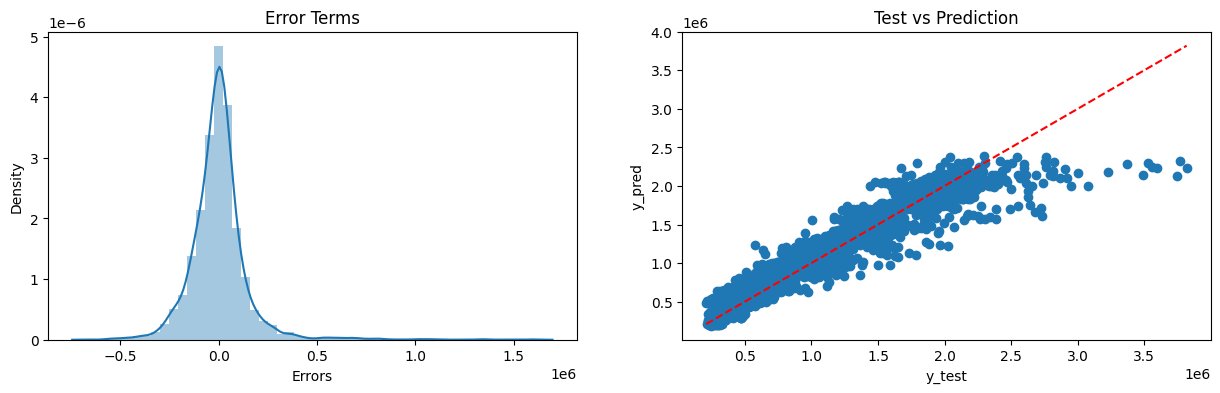

In [33]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1047603.298112138


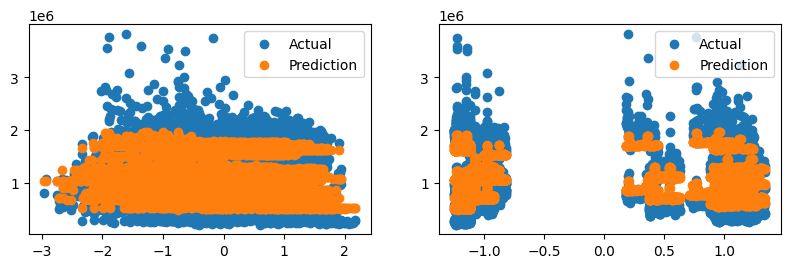



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.7871424160759005
Residual Sum of Squares (RSS) on Training set  ---> 328042527278329.0
Mean Squared Error (MSE) on Training set       ---> 68887552977.38954
Root Mean Squared Error (RMSE) on Training set ---> 262464.3842074378

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.7923376537640883
Residual Sum of Squares (RSS) on Training set  ---> 84597336677879.95
Mean Squared Error (MSE) on Training set       ---> 71030509385.28963
Root Mean Squared Error (RMSE) on Training set ---> 266515.49558194476

--------------------Residual Plots--------------------


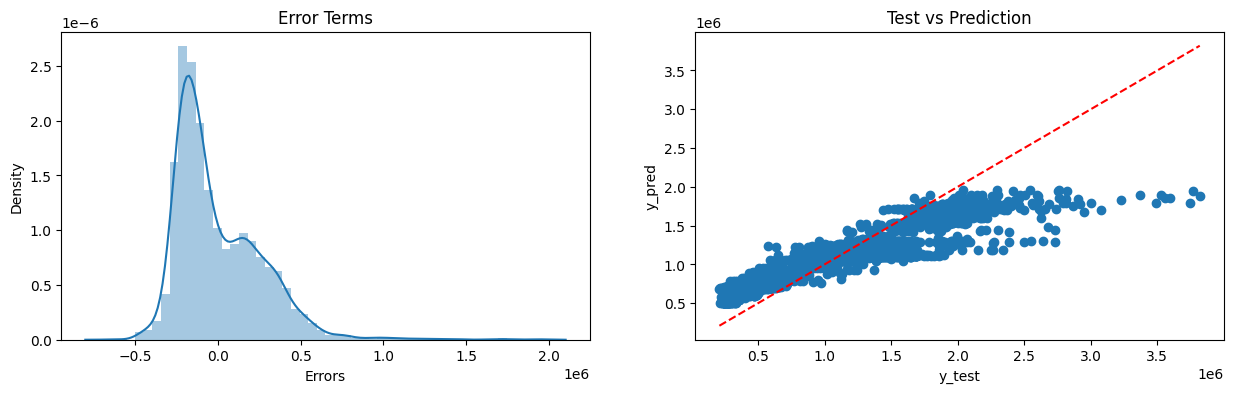

In [34]:
#Creating a ElasticNet Regression model

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
#print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="https://raw.githubusercontent.com/Masterx-AI/Master-AI/main/3.%20Machine%20Learning/Z-Etc/Reg/pn.png" style="width: 500px;float: left;"/>

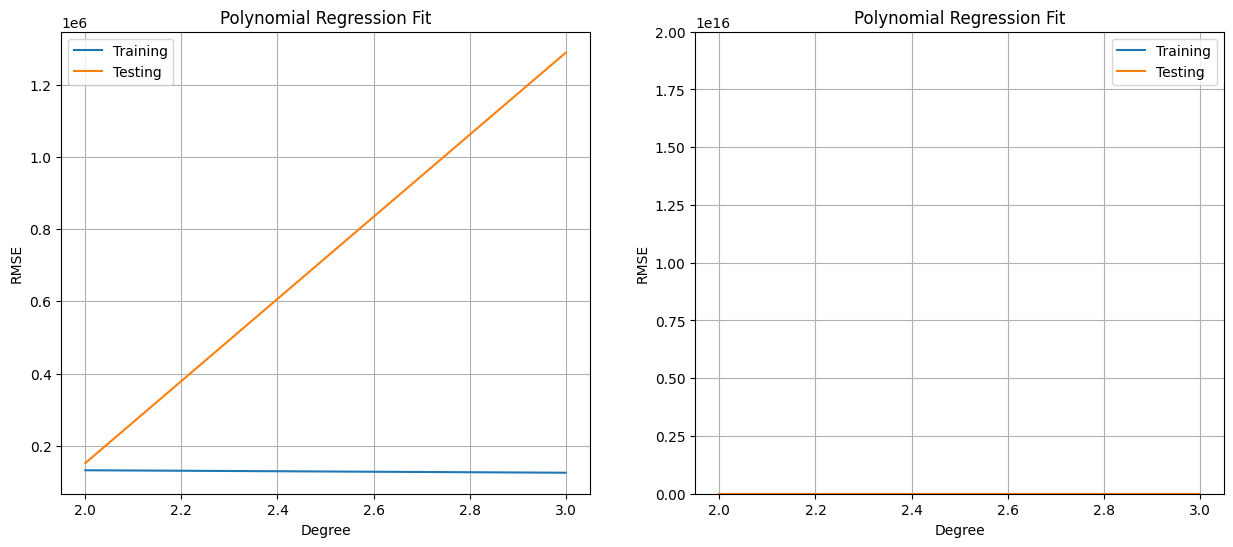

In [35]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=4

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,2e16])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 2nd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [  20994.84559677  227390.04858906   31804.06199226   74824.11542794
   67047.30306019 -167295.37787281  158994.71000533 -169344.72504638
 -115145.31430541  -91321.19625995 -137612.2399299   138101.61019103
  -23162.67597162  158091.22199972  109994.6575779   -57057.1944685
 -124597.14379525   67904.21264383  103609.47722692 -109537.59789928
   52722.33661041   54708.75713097 -114216.82932918  118627.30850624
  -72092.52083921 -166183.27103103  -26703.18677157 -110473.39901656
 -168992.17776092 -148340.20789707  -23327.50120846  -64521.60327083
 -126739.21866619  -98607.46178895  -77491.02524189]
The Intercept of the Regresion Model was found to be  1047603.298112138


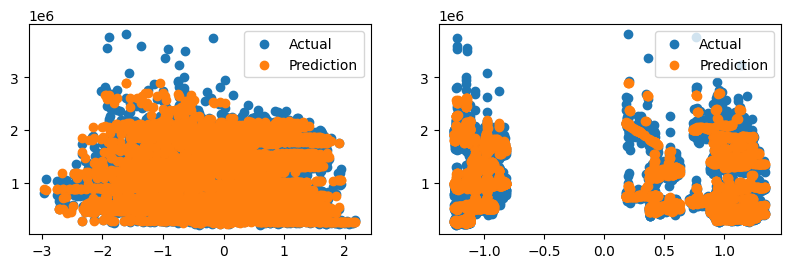



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9456459920895561
Residual Sum of Squares (RSS) on Training set  ---> 83766929013937.5
Mean Squared Error (MSE) on Training set       ---> 17590703278.861298
Root Mean Squared Error (RMSE) on Training set ---> 132629.94864984794

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9320967255718058
Residual Sum of Squares (RSS) on Training set  ---> 27662386910559.734
Mean Squared Error (MSE) on Training set       ---> 23226185483.25754
Root Mean Squared Error (RMSE) on Training set ---> 152401.39593605284

--------------------Residual Plots--------------------


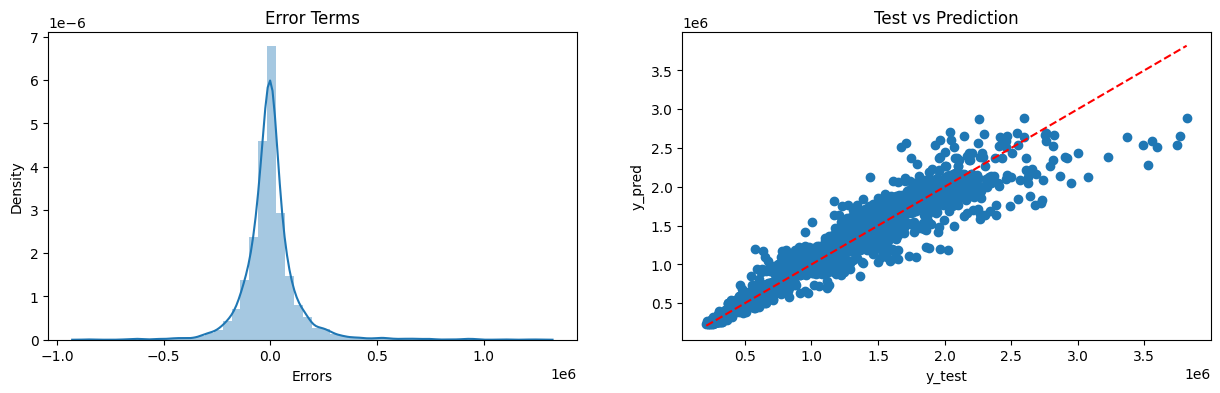

In [36]:
#Using the 2nd Order Polynomial Regression model (degree=2)

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [37]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.930050,0.929058,1.078027e+14,2.890027e+13,2.263811e+10,2.426555e+10,150459.661665,155774.024313
Ridge Linear Regression (RLR),0.930050,0.929068,1.078030e+14,2.889617e+13,2.263818e+10,2.426210e+10,150459.882374,155762.975093
Lasso Linear Regression (LLR),0.930050,0.929058,1.078027e+14,2.890013e+13,2.263811e+10,2.426543e+10,150459.661933,155773.646908
Elastic-Net Regression (ENR),0.787142,0.792338,3.280425e+14,8.459734e+13,6.888755e+10,7.103051e+10,262464.384207,266515.495582
Polynomial Regression (PNR),0.945646,0.932097,8.376693e+13,2.766239e+13,1.759070e+10,2.322619e+10,132629.948650,152401.395936


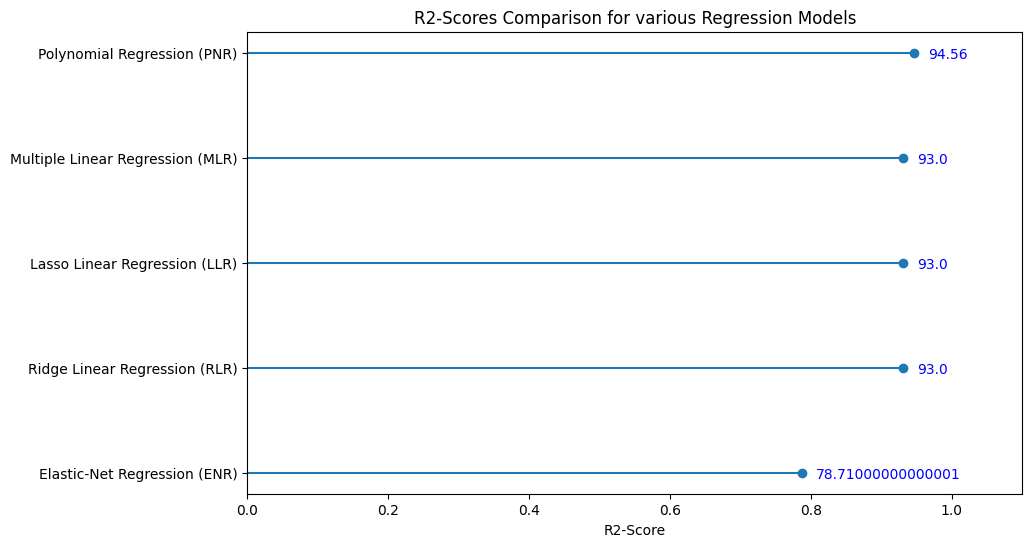

In [38]:
# R2-Scores Comparison for different Regression Models

R2 = round(EMC['Train-R2'].sort_values(ascending=True),4)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

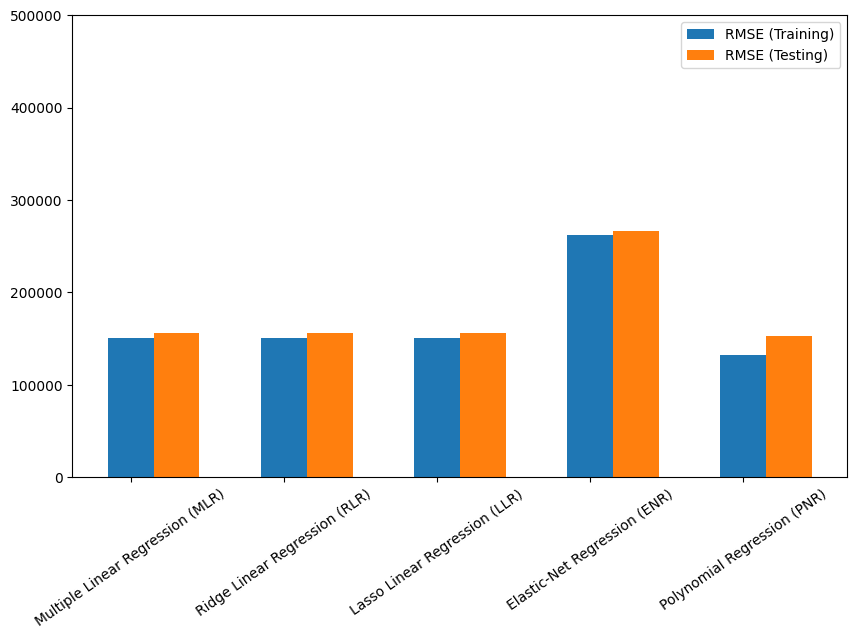

In [39]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,500000])
plt.show()

**Inference:**\
Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions clearly overfitting the current problem. Surprisingly simple Multiple Linear Regression Model gave the best results. 

---

# <center> 7. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small with just 6435 samples & after preprocessing 7.5% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we shortlisted the appropriate features with VIF Technique.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- It is safe to use multiple regression algorithm performed better than other algorithms, as their scores were quiet comparable & also they're more generalisable.

In [40]:
#<<<--------------------------------------------THE END------------------------------------------------>>>